# Benchmarking and script testing

- What are problems it solves

- An example of a research problem: sentiment analysis

- What is benchmarking?

- What is experimantal design?

- Selected statistical schemes

- Script testing

- Possible appendix:
    - Hypothese testing
    - determining sampling size: hypothes testing
    - determining sampling size: parameter estimation

### Major problem: traceability of experiments & optimal time investment



<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## What is benchmarking?

<br>
##### Making the fair comparison to our and other algorithms possible. 


<br>
Benchmarking components:
* Shared (public) dataset: like Lena
<img style="float: right;" src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/220px-Lenna.png">

* Shared sucess metrics: RMSE, perception based tests

* Clearly defined experimental procedures 



<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## Example: a development of sentiment analysis algorithm 

- The experimental settings (figure)



- Research question: does the age matters?




#### Problem: how to get **the effect of age** out of all **other other effects** ? 


<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## Experimental design

- What is experimental design
    - nonexperimental designs
    - experimental design
    
  
- A scheme of experimental design (figure) 




- Elements of experimental design
    - outcome = dependent variable: how we measure sucess
    - factor(s) = independent variable(s): what we control
    - nuisance facotr(s) = independent variable(s): what we want to eliminate
    - possibly additional pure noise



#### Problem: is the effect size large enough to detect it
- What is effect size


#### Is the progres a coincidence or real?
- Solution: hypothese testing [Appendix if you chose to have it]


<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## On types of experimental designs

- Major design is covered by **ANOVA**
    - What is ANOVA: a scheme of input data, to the F-test (Figure)
    - Versions: MANOVA, ANCOVA
    - Names: 
        - one factor: one-way ANOVA
        - two factors two-way ANOBA
        - more than two factors: ---> factorial design



- Interesting design is a **Latin Square**
    - latin square covers two factors 
    - $n\times n$ Latin square (figure)
    - design guide: 
        - what are **two most relevant** factors?
        - how to group their levels into $n$ values?



<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## Toward the implementation: testing schemes

### Must have 
* train and test set are disjoint 
* one split is not enough: you could be lucky



### Solution: folding
* 10-fold cross validation
* randomized foldoing
* leave one out


<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## Concept of script testing

### Problem of 
- **traceability**: can you recosntruct the experiment after sine time? 
    * When PhD student leaves
    * Re-run of experiments from a few years back?
    * Trace several 100 of experiments? 
- **time investment** of a researcher


### What does not work
* Writing reports by hand
* Automatic documenting systems 


### Solution: self-documenting scripts

* The script runExperiments.py:
    - is the documentation
    - fully automatically report results




* "Do not drag the data arround"



* Fixed strucuture of data access: HD maps or DB  



* The strucuture of test script


<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


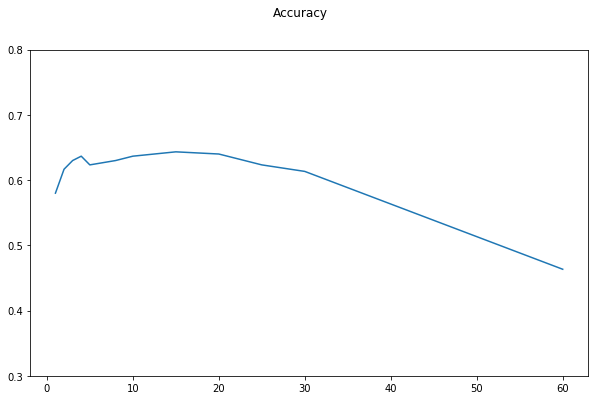

In [1]:
%matplotlib inline

# Directories
# 01-Experiments\ExpKey1\runExperiment.py
#               \ExpKey1\runExperiment.py
# 02-Data\DataKey1\
#        \DataKey2\ 
# 03-Tools\kNN_mu\
#         \parser\ 

def get_dists(x, k, train_set):
    ts_len = train_set.shape[0]
    dist_arr = np.zeros(ts_len)
    for ii in range(ts_len):
        dist_arr[ii] = np.linalg.norm(train_set.iloc[ii, :] - x)
       
    ord_dist_arr = np.sort(dist_arr)
    return ord_dist_arr[0:k]
    
    
#def write_to_file(filename, string):
#    with open(filename, "a") as out:
#        out.write("{}\n".format(string))
def trace_to_file(trace_f, string):
    if trace_Q:
        trace_f.write("{}".format(string))
    else:
        print "{}".format(string)
        
def trace_to_file_EOL(trace_f, string):
    if trace_Q:
        trace_f.write("{}".format(string) + "\n")
    else:
        print "{}".format(string) + "\n"

        
        
# ===========================================================================================================        
## 1. Short description -------------------------------------------------------------------------------------
# @brief An optimization of kNN classification regarding a parametr k
# @author AndrejK
# @time 2018-03-16


# ===========================================================================================================
## 2. Configuration, libraries ------------------------------------------------------------------------------
# Data
abs_path = '/home/nbuser/library/'
data_path1 = '../../02-Data/08-Iris/'
data_path2 = '/home/nbuser/library/'
data_FN = 'iris.data'

# Functions
funct_path = '/home/nbuser/library/00xBed/03-Tools/'

# Trace files 
rel_path = '00xBed/01-Experiments/'
core_trace_FN = '_OptimalKNN_trace.txt'
trace_Q = True

# Load libraries -------------------------------------------------------------------------------------------
import os, platform, sys
import numpy as np
import pandas as pd
import datetime as dt
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs




# ===========================================================================================================
# 3. Experimental design ---------------------------------------------------------------------------------------
k_lst = [1, 2, 3, 4, 5, 8, 10, 15, 20, 25, 30, 60] # factor
# k_lst = range(1, 20)
folds_num = 10
train_test_p = 0.3
weights_in = 'uniform' # 'distance' 



# ============================================================================================================
# 4. Load data & trace files ---------------------------------------------------------------------------------
    
# Load data & rearange it
#data = datasets.load_boston() # Load and return the boston house-prices dataset (regression).
#data = datasets.load_iris() #Load and return the iris dataset (classification).
#data = datasets.load_diabetes() # Load and return the diabetes dataset (regression).
#data = datasets.load_digits() # Load and return the digits dataset (classification).
#data = datasets.load_linnerud() # Load and return the linnerud dataset (multivariate regression).
#data = datasets.load_breast_cancer() # Load and return the breast cancer wisconsin dataset (classification).
#data = datasets.load_boston() 
#data.target = data.target * 10

# Randomly generte data
num_of_s, num_of_feats, num_of_cls = 100, 5, 3
cluster_stdIn = 1.2
center_boxIn = (-2.0, 2.0) 
X, y = make_blobs(n_samples=num_of_s, centers=num_of_cls, n_features=num_of_feats, random_state=0, cluster_std=cluster_stdIn, center_box=center_boxIn)

# Creare trace file
time_curr = dt.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
trace_FN = abs_path + rel_path + time_curr + core_trace_FN
if trace_Q:
    trace_file = open(trace_FN, 'w') 


        
## Settings -------------------------------------------------------------------------------------------------
# Flatten experiment - do develop single run case
k = 3

# Permutation
#np.random.randint(3, 10)
# all_perm = np.random.permutation(range(data_len))
# cut_ind = int(np.floor(train_test_p*data_len))
# train_perm = all_perm[cut_ind:]
# test_perm = all_perm[0:cut_ind]


# train_fold = iris_data.loc[train_perm]
# test_fold = iris_data.loc[test_perm]

# f_curr = iris_data.loc[12, ['f1', 'f2', 'f3', 'f4']]
# C_curr = iris_data.loc[12, ['C']]
# #print C_curr


# =============================================================================================================
# 5. Report ---------------------------------------------------------------------------------------------------
# Basics
trace_to_file_EOL(trace_file, 'An optimization of kNN classification regarding a parametr k')
trace_to_file_EOL(trace_file, 'Time: ' + time_curr)
trace_to_file_EOL(trace_file, 'OS: ' + platform.system())
trace_to_file_EOL(trace_file, 'Python ver: ' + platform.python_version())

# Experimental design
trace_to_file_EOL(trace_file, '')
trace_to_file_EOL(trace_file, 'NumOfFolds: ' + str(folds_num))
trace_to_file_EOL(trace_file, 'Test to train ratio: ' + str(train_test_p))
#trace_to_file(trace_file, )


# ============================================================================================================
# 6. Implement Experiment --------------------------------------------------------------------------------------------
trace_to_file_EOL(trace_file, '@@BeginTab')
trace_to_file_EOL(trace_file, 'Fold' + ' & ' + '{}'.format(k_lst))


acc_lst = []
 
for k in k_lst:
    fold_acc_lst = []
    for ii in range(folds_num): # 10-fold cross validation
             
        # Determine folds    
#         X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=train_test_p, random_state=np.random.randint(100))
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_test_p, random_state=np.random.randint(100))       
        # Train classifier
        clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weights_in)
        clf.fit(X_train, y_train)
       
        # Classify
        pred_C = clf.predict(X_test)
        true_C = y_test
 
        # Generate conf mat
        conf_mat = confusion_matrix(true_C, pred_C)
        
        # Compute & store accuracy
        acc_score = accuracy_score(true_C, pred_C)
        fold_acc_lst.append(acc_score)
       
    
        # Report it
        trace_to_file(trace_file, str(ii) + ' & ' + '{0:.3f}'.format(acc_score)) 
        
    trace_to_file_EOL(trace_file, '')
        
    acc_lst.append(pd.Series(fold_acc_lst).mean())
             
acc_aver = pd.Series(acc_lst).mean()


# Close table 
trace_to_file_EOL(trace_file, '@@EndTab')
trace_to_file_EOL(trace_file, 'Average accuracy: ' + '{0:.3f}'.format(acc_score))  


# Plot figures
fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle(u'Accuracy')
ax.plot(k_lst, acc_lst)
ax.set_ylim([0.3, 0.8])
plt.show()
plt.savefig(abs_path + rel_path + 'Accuracy.pdf')
     


## Close trace files -------------------------------------------------------------------------------------------------
if trace_Q:
    trace_file.close()




#<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## On runExperiment.ext guidelines

- the language: 
    - better interpreted language like python, matlab, TCL/TK, ...
    - requirements: writing files, runnig OS commands, some string manipulation
    

- names with meaning
    - vars, file names, ... with meaning: count_ind and not w3 -> additional cognitive load
    - automatic file name generation with time stamps: yyyy-mm-dd-hh-mm-ss_ExperimentKeys
    
    
- what is new and what is modified experiment?
    - experimetal keys for good naming
    - copy + modify -> **best time investment**


<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## Take away notes

- script testing is a good 
    - traceability
    - time investment
    
    
    
- think about the experimental design **before** you do anything (colecting data, ...)
    - plan all data procedures in advance
    - read 14 questions at https://en.wikipedia.org/wiki/Design_of_experiments
    - discuss it with many people
    
    
- in research: the terminology to transfer the responsibility of the interpretation to the reader    




<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

# Apendix

<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## Statistical hypothese testing

#### Problem: decide if the effect is a coincidence or not

- When we need it: when there is a source of randomness in data: noised measurments, human behaviour  



#### Solution: statistical significance testing

- null hypotheses $H_0$: no effect
- p-value
$$ p = Pr[\mbox{experimental data is this or more deviated from $H_0$}\Big|_{H_0}] $$
- risk level $\alpha$: what you are prepared to believe? 
- conclussion: $p < \alpha \Rightarrow H_0 \mbox{rejected}$. The **effect is significant**.
- the matrix of errors


- note on a significance


- statistical test is a package of 
    - null hypotheses $H_0$
    - formula to compute p value
    - assumptions when it works
    
    
- selection of the right test
    - hierarchy of tests
    - the most powerful that meets assumptions


<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## Finding the size of the sample for hypotheses: apriori power analysis

- types of erros and their probability


- effect size - specific for each testing
    - for instance comparing means: 
    $$ \frac{\overline{x_1} - \overline{x_2}}{\sigma_{x_1, x_2}} $$


- Cohen:
    - small: $es < 0.2$
    - medium: $0.2 \leq es < 0.7$
    - large: $0.7 \leq es$
    
    
- From test type and effect size you can get lower limit of your sample size $n_0$ 
    - Software GPower
    
    
    
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## Finding the size of the sample for parameter estimation: confidece intervals

- the problem of parameter estimation


- confidence interval
$$ CI = [\hat{\overline{x}} - 1.96 \frac{\hat{\sigma}}{\sqrt{n}}, 
\hat{\overline{x}} + 1.96 \frac{\hat{\sigma}}{\sqrt{n}}] $$


- determination of sample size

<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## 

<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">